# End-End Depression Prediction
Your Goal: Your goal is to use data from a mental health survey to explore factors that may cause individuals to experience depression.
This Notebook is looks into machine leaning and Data science liberies. the aim of this project is to build a machine learning model that is capable of predicting whether or not and individual is depressed through the data provided by Kaggle.
> I am going to take the following approach

1. Problem Defination
2. Data
3. Evaluation
4. Features
5. Modeling


## Problem Defination
using the following dataset from Kaggle. Can i predict wether or not an individual is depressed?

## Data
kaggle believed that the data is self explanatory so they didnt provide us with data dictionary
here is the lint to the data: https://www.kaggle.com/competitions/playground-series-s4e11/data

The dataset for this competition (both train and test) was generated from a deep learning model trained on the Depression Survey/Dataset for Analysis dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

### File
* train.csv - the training dataset; class is the binary target (either e or p)
* test.csv - the test dataset; your objective is to predict target class for each row
* sample_submission.csv - a sample submission file in the correct format

## Evaluation
according to kaggle we we're asked to evaluated the model with (Accuracy Score).

## Features
the features of this dataset is self explanatory and Kaggle did not provide any features dictonary along the dataset

In [2]:
# importing the liberies need for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [3]:
# now let me read my data
df =pd.read_csv("data/train.csv")

In [4]:
df

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,Female,18.0,Ahmedabad,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,140696,Lata,Female,41.0,Hyderabad,Working Professional,Content Writer,NaN,5.0,NaN,NaN,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,NaN,3.0,NaN,NaN,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0
140698,140698,Prachi,Female,49.0,Srinagar,Working Professional,Plumber,NaN,5.0,NaN,NaN,2.0,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0


In [5]:
df.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [6]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,140690,140691,140692,140693,140694,140695,140696,140697,140698,140699
id,0,1,2,3,4,5,6,7,8,9,...,140690,140691,140692,140693,140694,140695,140696,140697,140698,140699
Name,Aaradhya,Vivan,Yuvraj,Yuvraj,Rhea,Vani,Ritvik,Rajveer,Aishwarya,Simran,...,Rashi,Zara,Raunak,Shaurya,Ishaani,Vidya,Lata,Aanchal,Prachi,Sai
Gender,Female,Male,Male,Male,Female,Female,Male,Male,Female,Female,...,Female,Female,Male,Male,Female,Female,Female,Female,Female,Male
Age,49.0,26.0,33.0,22.0,30.0,59.0,47.0,38.0,24.0,42.0,...,18.0,57.0,49.0,55.0,45.0,18.0,41.0,24.0,49.0,27.0
City,Ludhiana,Varanasi,Visakhapatnam,Mumbai,Kanpur,Ahmedabad,Thane,Nashik,Bangalore,Patna,...,Ludhiana,Meerut,Bhopal,Srinagar,Ahmedabad,Ahmedabad,Hyderabad,Kolkata,Srinagar,Patna
Working Professional or Student,Working Professional,Working Professional,Student,Working Professional,Working Professional,Working Professional,Working Professional,Working Professional,Student,Working Professional,...,Student,Working Professional,Working Professional,Working Professional,Working Professional,Working Professional,Working Professional,Working Professional,Working Professional,Student
Profession,Chef,Teacher,NaN,Teacher,Business Analyst,Finanancial Analyst,Chemist,Teacher,NaN,Electrician,...,NaN,Teacher,Financial Analyst,Data Scientist,Teacher,NaN,Content Writer,Marketing Manager,Plumber,NaN
Academic Pressure,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
Work Pressure,5.0,4.0,NaN,5.0,1.0,2.0,5.0,3.0,NaN,4.0,...,NaN,1.0,4.0,1.0,2.0,5.0,5.0,3.0,5.0,NaN
CGPA,NaN,NaN,8.97,NaN,NaN,NaN,NaN,NaN,5.9,NaN,...,6.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.24


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [7]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


In [9]:
df.isna().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

After taking looks about the data given in this project we have many datatypes including object,int,float with alot of missing values, so next now am going to do same EDA and Visualizations with the datas

In [10]:
df.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [11]:
# let's try to know the number of people that are Depressed
number_of_depressed= df["Depression"].value_counts()
number_of_depressed

Depression
0    115133
1     25567
Name: count, dtype: int64

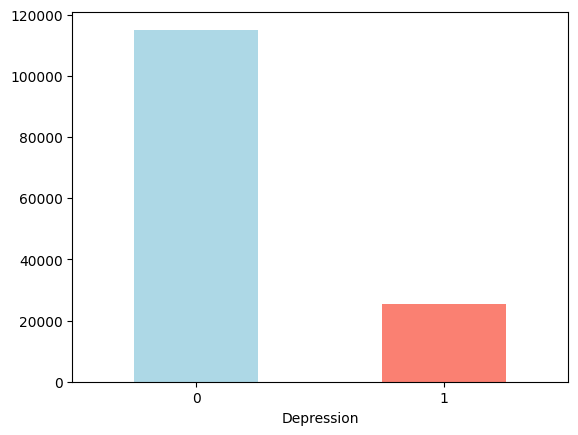

In [12]:
# let's visualize it
number_of_depressed.plot(kind="bar", color =["lightblue","salmon"])
plt.xticks(rotation=0);

In [13]:
df.head(2)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1


In [14]:
df["Gender"]

0         Female
1           Male
2           Male
3           Male
4         Female
           ...  
140695    Female
140696    Female
140697    Female
140698    Female
140699      Male
Name: Gender, Length: 140700, dtype: object

In [15]:
gender_count= df["Gender"].value_counts()
gender_count

Gender
Male      77464
Female    63236
Name: count, dtype: int64

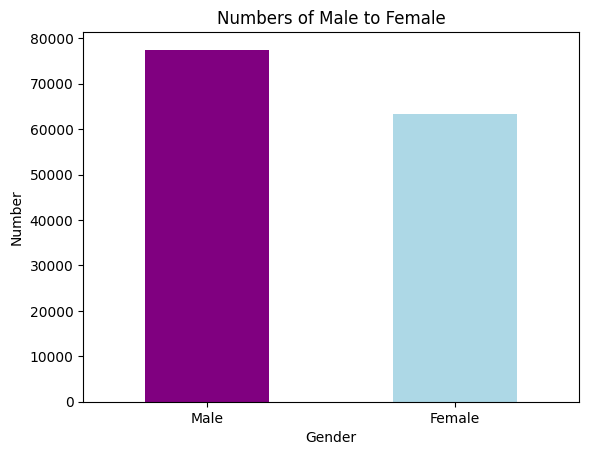

In [16]:
gender_count.plot(kind="bar",color =["purple","lightblue"])
plt.title("Numbers of Male to Female")
plt.xlabel("Gender")
plt.ylabel("Number")
plt.xticks(rotation =0);

<Axes: ylabel='Frequency'>

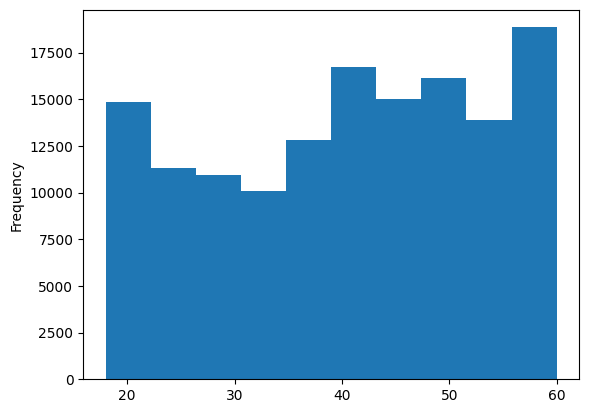

In [17]:
df["Age"].plot.hist()

In [18]:
pd.crosstab(df.Age,df.Depression)

Depression,0,1
Age,,
18.0,1140,2781
19.0,969,1665
20.0,1331,2184
21.0,901,1841
22.0,978,1088
23.0,1282,1618
24.0,1482,1873
25.0,1352,1579
26.0,1234,874


In [18]:
pd.crosstab(df.Gender,df.Depression)

Depression,0,1
Gender,,
Female,51965,11271
Male,63168,14296


<Axes: xlabel='Gender'>

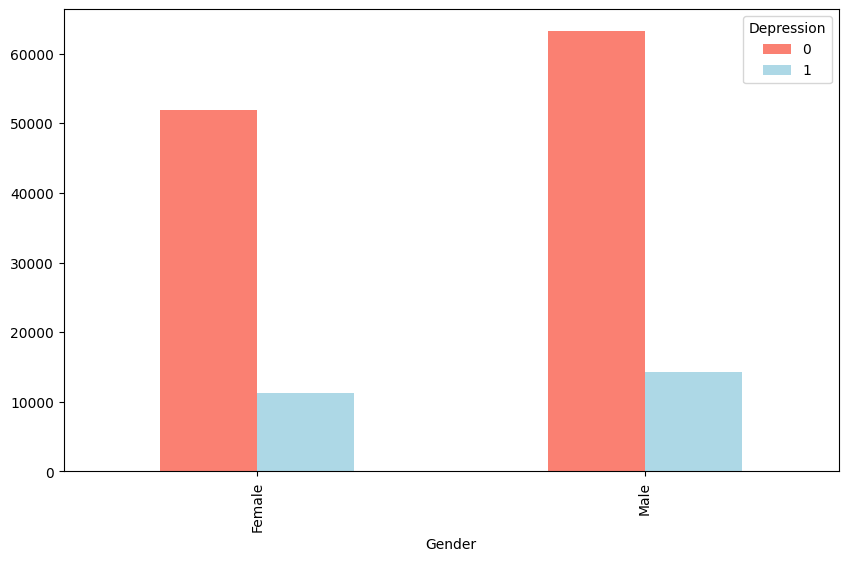

In [19]:
pd.crosstab(df.Gender,df.Depression).plot(kind="bar",
                                          figsize=(10,6),
                                          color=["salmon","lightblue"])


In [20]:
df.head(2)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1


In [21]:
df["Dietary Habits"]

0           Healthy
1         Unhealthy
2           Healthy
3          Moderate
4         Unhealthy
            ...    
140695    Unhealthy
140696     Moderate
140697     Moderate
140698     Moderate
140699      Healthy
Name: Dietary Habits, Length: 140700, dtype: object

In [22]:
df["Have you ever had suicidal thoughts ?"]

0          No
1         Yes
2         Yes
3         Yes
4         Yes
         ... 
140695     No
140696    Yes
140697     No
140698    Yes
140699    Yes
Name: Have you ever had suicidal thoughts ?, Length: 140700, dtype: object

In [23]:
pd.crosstab(df["Have you ever had suicidal thoughts ?"],df["Depression"])

Depression,0,1
Have you ever had suicidal thoughts ?,,
No,67680,3458
Yes,47453,22109


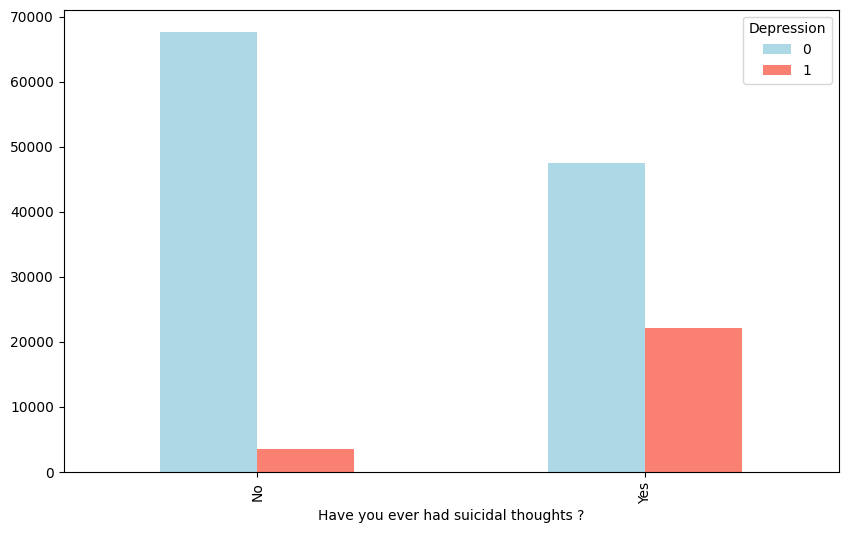

In [24]:
pd.crosstab(df["Have you ever had suicidal thoughts ?"],df["Depression"]).plot(kind="bar",
                                                                               figsize=(10,6),
                                                                               color=["lightblue","salmon"]);

## Data Cleaning
In the dataset we lots missing values and like we know there is no proper way of solving this but am going to use one of the bet metrix

In [25]:
df

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,Female,18.0,Ahmedabad,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,140696,Lata,Female,41.0,Hyderabad,Working Professional,Content Writer,NaN,5.0,NaN,NaN,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,NaN,3.0,NaN,NaN,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0
140698,140698,Prachi,Female,49.0,Srinagar,Working Professional,Plumber,NaN,5.0,NaN,NaN,2.0,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0


In [24]:
df.isna().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [26]:
# am going to divide this dataset into two which is numeric and non_numeric data
for label,content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Name
Gender
City
Working Professional or Student
Sleep Duration
Have you ever had suicidal thoughts ?
Family History of Mental Illness


In [27]:
for label,content in df.items():
    if not pd.api.types.is_string_dtype(content):
        print(label)

id
Age
Profession
Academic Pressure
Work Pressure
CGPA
Study Satisfaction
Job Satisfaction
Dietary Habits
Degree
Work/Study Hours
Financial Stress
Depression


now that i have divided the data into numeric and non-numeric data now let first work on the numeric data

In [28]:
df.head(2)


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1


In [26]:
# filling the columns with the mean of the columns
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # adding a binary colums that state that the coulums is previously having a missing data
            df[label+"_is_missing"]=pd.isnull(content)
            df[label]=content.fillna(content.median())

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 26 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      140700 non-null  float64
 8   Work Pressure                          140700 non-null  float64
 9   CGPA                                   140700 non-null  float64
 10  Study Satisfaction                     140700 non-null  

In [7]:
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        pd.isnull(content).sum():
        

SyntaxError: invalid syntax (2543945733.py, line 3)

In [28]:
df.head(1)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,...,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Academic Pressure_is_missing,Work Pressure_is_missing,CGPA_is_missing,Study Satisfaction_is_missing,Job Satisfaction_is_missing,Financial Stress_is_missing
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,3.0,5.0,7.77,...,1.0,2.0,No,0,True,False,True,True,False,False


In [35]:
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label]=content.astype("category").cat.as_ordered()

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 36 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   id                                                140700 non-null  int64  
 1   Name                                              140700 non-null  int16  
 2   Gender                                            140700 non-null  int8   
 3   Age                                               140700 non-null  float64
 4   City                                              140700 non-null  int8   
 5   Working Professional or Student                   140700 non-null  int8   
 6   Profession                                        140700 non-null  int8   
 7   Academic Pressure                                 140700 non-null  float64
 8   Work Pressure                                     140700 non-null  float64
 9   CGPA

In [37]:
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label+"_is_missing"]=pd.isnull(content)
        df[label]=pd.Categorical(content).codes+1

In [34]:
df.isna().sum()

id                                                  0
Name                                                0
Gender                                              0
Age                                                 0
City                                                0
Working Professional or Student                     0
Profession                                          0
Academic Pressure                                   0
Work Pressure                                       0
CGPA                                                0
Study Satisfaction                                  0
Job Satisfaction                                    0
Sleep Duration                                      0
Dietary Habits                                      0
Degree                                              0
Have you ever had suicidal thoughts ?               0
Work/Study Hours                                    0
Financial Stress                                    0
Family History of Mental Ill

In [38]:
df

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,...,Name_is_missing,Gender_is_missing,City_is_missing,Working Professional or Student_is_missing,Profession_is_missing,Sleep Duration_is_missing,Dietary Habits_is_missing,Degree_is_missing,Have you ever had suicidal thoughts ?_is_missing,Family History of Mental Illness_is_missing
0,0,12,1,49.0,51,2,11,3.0,5.0,7.77,...,False,False,False,False,False,False,False,False,False,False
1,1,408,2,26.0,94,2,56,3.0,4.0,7.77,...,False,False,False,False,False,False,False,False,False,False
2,2,418,2,33.0,98,1,0,5.0,3.0,8.97,...,False,False,False,False,True,False,False,False,False,False
3,3,418,2,22.0,65,2,56,3.0,5.0,7.77,...,False,False,False,False,False,False,False,False,False,False
4,4,287,1,30.0,38,2,10,3.0,1.0,7.77,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,399,1,18.0,5,2,0,3.0,5.0,7.77,...,False,False,False,False,True,False,False,False,False,False
140696,140696,194,1,41.0,27,2,16,3.0,5.0,7.77,...,False,False,False,False,False,False,False,False,False,False
140697,140697,8,1,24.0,45,2,39,3.0,3.0,7.77,...,False,False,False,False,False,False,False,False,False,False
140698,140698,253,1,49.0,85,2,48,3.0,5.0,7.77,...,False,False,False,False,False,False,False,False,False,False


## Modeling 
now that i am done with data clearning it's time to train the data and find partten between the data

In [39]:
# let's the data into training and validation set
train_data, val_data =train_test_split(df,test_size=0.2, random_state=42)

In [40]:
len(train_data), len(val_data)

(112560, 28140)

In [41]:
train_data

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,...,Name_is_missing,Gender_is_missing,City_is_missing,Working Professional or Student_is_missing,Profession_is_missing,Sleep Duration_is_missing,Dietary Habits_is_missing,Degree_is_missing,Have you ever had suicidal thoughts ?_is_missing,Family History of Mental Illness_is_missing
33707,33707,300,2,55.0,12,2,56,3.0,1.0,7.77,...,False,False,False,False,False,False,False,False,False,False
133592,133592,190,2,54.0,87,2,56,3.0,5.0,7.77,...,False,False,False,False,False,False,False,False,False,False
113169,113169,319,2,48.0,50,2,56,3.0,4.0,7.77,...,False,False,False,False,False,False,False,False,False,False
42896,42896,50,2,24.0,66,2,56,3.0,1.0,7.77,...,False,False,False,False,False,False,False,False,False,False
82457,82457,192,2,38.0,59,2,0,3.0,4.0,7.77,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,110268,71,1,46.0,38,2,2,3.0,2.0,7.77,...,False,False,False,False,False,False,False,False,False,False
119879,119879,162,1,42.0,95,2,38,3.0,4.0,7.77,...,False,False,False,False,False,False,False,False,False,False
103694,103694,45,1,19.0,51,2,0,3.0,5.0,7.77,...,False,False,False,False,True,False,False,False,False,False
131932,131932,318,1,19.0,79,2,0,3.0,5.0,7.77,...,False,False,False,False,True,False,False,False,False,False


In [39]:
val_data

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,...,Name_is_missing,Gender_is_missing,City_is_missing,Working Professional or Student_is_missing,Profession_is_missing,Sleep Duration_is_missing,Dietary Habits_is_missing,Degree_is_missing,Have you ever had suicidal thoughts ?_is_missing,Family History of Mental Illness_is_missing
18347,18347,325,1,51.0,73,2,56,3.0,3.0,7.77,...,False,False,False,False,False,False,False,False,False,False
96193,96193,358,1,20.0,4,2,0,3.0,1.0,7.77,...,False,False,False,False,True,False,False,False,False,False
100005,100005,8,1,21.0,5,1,0,2.0,3.0,7.82,...,False,False,False,False,True,False,False,False,False,False
39890,39890,273,2,36.0,28,2,56,3.0,5.0,7.77,...,False,False,False,False,False,False,False,False,False,False
98243,98243,293,2,60.0,65,2,30,3.0,2.0,7.77,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65990,65990,311,2,43.0,45,2,32,3.0,5.0,7.77,...,False,False,False,False,False,False,False,False,False,False
22536,22536,348,2,46.0,20,2,48,3.0,2.0,7.77,...,False,False,False,False,False,False,False,False,False,False
107320,107320,391,1,21.0,5,1,0,3.0,3.0,9.91,...,False,False,False,False,True,False,False,False,False,False
53911,53911,47,2,20.0,77,1,0,1.0,3.0,8.24,...,False,False,False,False,True,False,False,False,False,False


In [42]:
X_train, y_train = train_data.drop("Depression", axis=1), train_data["Depression"]
X_valid, y_valid = val_data.drop("Depression", axis=1), val_data["Depression"]

In [43]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((112560, 35), (112560,), (28140, 35), (28140,))

In [54]:
# create a function for evaluation
def show_score(clf):
    # make prediction
    train_preds =clf.predict(X_train)
    valid_preds =clf.predict(X_valid)
    
    scores={
        "Train confussion matrix":confusion_matrix(y_train,train_preds),
        "valid confussion matrix":confusion_matrix(y_valid, valid_preds),
        "train Accuracy score":accuracy_score(y_train, train_preds),
        "valid Accuracy score":accuracy_score(y_valid, valid_preds),
        "Train classification report":classification_report(y_train,train_preds),
        "valid classification report":classification_report(y_valid,valid_preds)
    }
    return scores



In [42]:
clf= XGBClassifier(n_jobs=4,random_state=42,subsample=0.8,learning_rate= 0.2)
clf.fit(X_train,y_train)
clf.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.2,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': 4,
 'num_parallel_tree': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': 0.8,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [43]:
# Call the function and store the results in clf_scores
clf_scores = show_score(clf)

# Print each score
for key, value in clf_scores.items():
    print(f"{key}:\n{value}\n")

Train confussion matrix:
[[89742  2405]
 [ 2966 17447]]

valid confussion matrix:
[[22189   797]
 [  915  4239]]

train Accuracy score:
0.9522832267235253

valid Accuracy score:
0.9391613361762615

Train classification report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     92147
           1       0.88      0.85      0.87     20413

    accuracy                           0.95    112560
   macro avg       0.92      0.91      0.92    112560
weighted avg       0.95      0.95      0.95    112560


valid classification report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     22986
           1       0.84      0.82      0.83      5154

    accuracy                           0.94     28140
   macro avg       0.90      0.89      0.90     28140
weighted avg       0.94      0.94      0.94     28140




## Hyperparameters tuning with RandomizeSearchCV

In [62]:
%%time
from sklearn.model_selection import RandomizedSearchCV
#let pick different xgb parameters for tuning 
xgb_grid={
    "learning_rate":[0.01,0.1,0.2,0.3],
    "n_estimators":np.arange(200,1000,200),
    "max_depth":[3,5,7,10],
    "min_child_weight":[1,3,5,10],
    "subsample":[0.5,0.7],
    "colsample_bytree":[0.3,0.6,0.8,1.0],
    "gamma":[0,0.1,0.3,0.5],
    "reg_alpha":[0,0.1,0.5,1]
}
xgb_clf=RandomizedSearchCV(XGBClassifier(n_jobs=4,random_state=42),
                          param_distributions=xgb_grid,
                          n_iter=50,
                          cv=5,
                          verbose=True)
xgb_clf.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
CPU times: total: 2h 51s
Wall time: 32min 47s


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=None, n_jobs=4,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=50,
                   param_distributions={'colsample_bytree': [0.3, 0.6, 0.8,
                                                             1.0],
                                        'gamma': [0, 0.1, 0.3, 0.5],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'min_child_weight': [1, 3, 5, 10],
                                        'n_estimators': array([200, 400, 600, 800]),
                                        'reg_alpha': [0, 0.1, 0.5, 1],
                                        'subsample': [0.5, 0.7]},
                   verbose=True)

In [63]:
xgb_clf.best_params_

{'subsample': 0.7,
 'reg_alpha': 0.5,
 'n_estimators': 800,
 'min_child_weight': 10,
 'max_depth': 3,
 'learning_rate': 0.1,
 'gamma': 0.5,
 'colsample_bytree': 0.8}

In [68]:
ideal_model=XGBClassifier(subsample=1.0,
                         reg_alpha=0.5,
                         n_estimators=800,
                         min_child_weight=10,
                         max_depth=3,
                         learning_rate=0.1,
                         gamma=0.5,
                         colsample_bytree=0.8,
                         random_state=42)
ideal_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=800, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [69]:
# Call the function and store the results in clf_scores
clf_scores = show_score(ideal_model)

# Print each score
for key, value in clf_scores.items():
    print(f"{key}:\n{value}\n")

Train confussion matrix:
[[89300  2847]
 [ 3574 16839]]

valid confussion matrix:
[[22206   780]
 [  927  4227]]

train Accuracy score:
0.94295486851457

valid Accuracy score:
0.9393390191897655

Train classification report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     92147
           1       0.86      0.82      0.84     20413

    accuracy                           0.94    112560
   macro avg       0.91      0.90      0.90    112560
weighted avg       0.94      0.94      0.94    112560


valid classification report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     22986
           1       0.84      0.82      0.83      5154

    accuracy                           0.94     28140
   macro avg       0.90      0.89      0.90     28140
weighted avg       0.94      0.94      0.94     28140




In [67]:
clf_scores = show_score(xgb_clf)

# Print each score
for key, value in clf_scores.items():
    print(f"{key}:\n{value}\n")

Train confussion matrix:
[[89408  2739]
 [ 3389 17024]]

valid confussion matrix:
[[22206   780]
 [  921  4233]]

train Accuracy score:
0.9455579246624023

valid Accuracy score:
0.9395522388059702

Train classification report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     92147
           1       0.86      0.83      0.85     20413

    accuracy                           0.95    112560
   macro avg       0.91      0.90      0.91    112560
weighted avg       0.94      0.95      0.95    112560


valid classification report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     22986
           1       0.84      0.82      0.83      5154

    accuracy                           0.94     28140
   macro avg       0.90      0.89      0.90     28140
weighted avg       0.94      0.94      0.94     28140




In [44]:
#importing the test dataset 
df_test=pd.read_csv("data/test.csv")

In [45]:
df_test

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93795,234495,Zoya,Female,49.0,Jaipur,Working Professional,Pilot,NaN,3.0,NaN,NaN,5.0,Less than 5 hours,Moderate,BSc,Yes,2.0,2.0,Yes
93796,234496,Shlok,Male,29.0,Ahmedabad,Working Professional,Pilot,NaN,5.0,NaN,NaN,1.0,7-8 hours,Moderate,BE,Yes,11.0,3.0,Yes
93797,234497,Rishi,Male,24.0,Visakhapatnam,Student,NaN,1.0,NaN,7.51,4.0,NaN,7-8 hours,Moderate,B.Tech,No,7.0,1.0,No
93798,234498,Eshita,Female,23.0,Kalyan,Working Professional,Marketing Manager,NaN,4.0,NaN,NaN,2.0,5-6 hours,Healthy,BA,Yes,7.0,5.0,Yes


In [46]:
for label, content in df_test.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # adding a binary colums that state that the coulums is previously having a missing data
            df_test[label+"_is_missing"]=pd.isnull(content)
            df_test[label]=content.fillna(content.median())
for label, content in df_test.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_test[label]=content.astype("category").cat.as_ordered()
for label, content in df_test.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_test[label+"_is_missing"]=pd.isnull(content)
        df_test[label]=pd.Categorical(content).codes+1

df_test.head(3)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,...,Name_is_missing,Gender_is_missing,City_is_missing,Working Professional or Student_is_missing,Profession_is_missing,Sleep Duration_is_missing,Dietary Habits_is_missing,Degree_is_missing,Have you ever had suicidal thoughts ?_is_missing,Family History of Mental Illness_is_missing
0,140700,289,2,53.0,68,2,28,3.0,2.0,7.8,...,False,False,False,False,False,False,False,False,False,False
1,140701,280,1,58.0,26,2,20,3.0,2.0,7.8,...,False,False,False,False,False,False,False,False,False,False
2,140702,366,2,53.0,22,2,57,3.0,4.0,7.8,...,False,False,False,False,False,False,False,False,False,False


In [47]:
set(X_train.columns)- set(df_test.columns)

{'Financial Stress_is_missing'}

In [48]:
df_test["Financial Stress_is_missing"]=False

In [49]:
df_test.head(2)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,...,Gender_is_missing,City_is_missing,Working Professional or Student_is_missing,Profession_is_missing,Sleep Duration_is_missing,Dietary Habits_is_missing,Degree_is_missing,Have you ever had suicidal thoughts ?_is_missing,Family History of Mental Illness_is_missing,Financial Stress_is_missing
0,140700,289,2,53.0,68,2,28,3.0,2.0,7.8,...,False,False,False,False,False,False,False,False,False,False
1,140701,280,1,58.0,26,2,20,3.0,2.0,7.8,...,False,False,False,False,False,False,False,False,False,False


In [51]:
df_test = df_test.reindex(columns=X_train.columns)
#test_preds =ideal_model.predict(df_test)

In [80]:
test_preds

array([0, 0, 0, ..., 0, 1, 0])

In [81]:
preds=pd.DataFrame()
preds["id"]=df_test["id"]
preds["Depression"]=test_preds

In [82]:
preds

,id,Depression
0,140700,0
1,140701,0
2,140702,0
3,140703,1
4,140704,0
...,...,...
93795,234495,0
93796,234496,1
93797,234497,0
93798,234498,1


In [83]:
preds.to_csv("data/test-prediction.csv", index=False)

let's try another model with thesame dataset, case stady of LogisticRegression.

In [84]:
# imoprting the model 

In [50]:
from sklearn.linear_model import LogisticRegression

In [52]:
clf_LR=LogisticRegression(n_jobs=-1,random_state=42)
clf_LR.fit(X_train, y_train)
clf_LR.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': -1,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [53]:
clf_scores = show_score(clf_LR)

# Print each score
for key, value in clf_scores.items():
    print(f"{key}:\n{value}\n")

Train confussion matrix:
[[87092  5055]
 [11081  9332]]

valid confussion matrix:
[[21751  1235]
 [ 2793  2361]]

train Accuracy score:
0.8566453447050462

valid Accuracy score:
0.8568585643212508

Train classification report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     92147
           1       0.65      0.46      0.54     20413

    accuracy                           0.86    112560
   macro avg       0.77      0.70      0.73    112560
weighted avg       0.84      0.86      0.85    112560


valid classification report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     22986
           1       0.66      0.46      0.54      5154

    accuracy                           0.86     28140
   macro avg       0.77      0.70      0.73     28140
weighted avg       0.84      0.86      0.85     28140




lets tune it abit

In [54]:
from sklearn.model_selection import GridSearchCV

In [58]:
LR_grid={
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2', 'l1'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500]
}

LR_clf=GridSearchCV(LogisticRegression(n_jobs=4,random_state=42),
                   param_grid=LR_grid,
                   cv=5,verbose=True)
LR_clf.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


C:\Users\Eddie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\Eddie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\Eddie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\Eddie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\Eddie\AppData\Local\Programs\Python\Python311\L

GridSearchCV(cv=5, estimator=LogisticRegression(n_jobs=4, random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 500], 'penalty': ['l2', 'l1'],
                         'solver': ['liblinear', 'saga']},
             verbose=True)

In [61]:
LR_clf.best_params_

{'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [63]:
best_model_LR= LogisticRegression(C= 10,
                                 max_iter= 100,
                                 penalty= "l1",
                                 solver= "liblinear")
best_model_LR.fit(X_train, y_train)

LogisticRegression(C=10, penalty='l1', solver='liblinear')

In [64]:
clf_scores = show_score(best_model_LR)

# Print each score
for key, value in clf_scores.items():
    print(f"{key}:\n{value}\n")

Train confussion matrix:
[[89097  3050]
 [ 4025 16388]]

valid confussion matrix:
[[22199   787]
 [  992  4162]]

train Accuracy score:
0.9371446339729922

valid Accuracy score:
0.9367803837953091

Train classification report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     92147
           1       0.84      0.80      0.82     20413

    accuracy                           0.94    112560
   macro avg       0.90      0.88      0.89    112560
weighted avg       0.94      0.94      0.94    112560


valid classification report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     22986
           1       0.84      0.81      0.82      5154

    accuracy                           0.94     28140
   macro avg       0.90      0.89      0.89     28140
weighted avg       0.94      0.94      0.94     28140




In [65]:
test_preds =best_model_LR.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Academic Pressure_is_missing
- CGPA_is_missing
- City_is_missing
- Degree_is_missing
- Dietary Habits_is_missing
- ...


In [66]:
X_train

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,...,Name_is_missing,Gender_is_missing,City_is_missing,Working Professional or Student_is_missing,Profession_is_missing,Sleep Duration_is_missing,Dietary Habits_is_missing,Degree_is_missing,Have you ever had suicidal thoughts ?_is_missing,Family History of Mental Illness_is_missing
33707,33707,300,2,55.0,12,2,56,3.0,1.0,7.77,...,False,False,False,False,False,False,False,False,False,False
133592,133592,190,2,54.0,87,2,56,3.0,5.0,7.77,...,False,False,False,False,False,False,False,False,False,False
113169,113169,319,2,48.0,50,2,56,3.0,4.0,7.77,...,False,False,False,False,False,False,False,False,False,False
42896,42896,50,2,24.0,66,2,56,3.0,1.0,7.77,...,False,False,False,False,False,False,False,False,False,False
82457,82457,192,2,38.0,59,2,0,3.0,4.0,7.77,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,110268,71,1,46.0,38,2,2,3.0,2.0,7.77,...,False,False,False,False,False,False,False,False,False,False
119879,119879,162,1,42.0,95,2,38,3.0,4.0,7.77,...,False,False,False,False,False,False,False,False,False,False
103694,103694,45,1,19.0,51,2,0,3.0,5.0,7.77,...,False,False,False,False,True,False,False,False,False,False
131932,131932,318,1,19.0,79,2,0,3.0,5.0,7.77,...,False,False,False,False,True,False,False,False,False,False


In [80]:
df_test

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,...,Name_is_missing,Gender_is_missing,City_is_missing,Working Professional or Student_is_missing,Profession_is_missing,Sleep Duration_is_missing,Dietary Habits_is_missing,Degree_is_missing,Have you ever had suicidal thoughts ?_is_missing,Family History of Mental Illness_is_missing
0,140700,289,2,53.0,68,2,28,3.0,2.0,7.80,...,False,False,False,False,False,False,False,False,False,False
1,140701,280,1,58.0,26,2,20,3.0,2.0,7.80,...,False,False,False,False,False,False,False,False,False,False
2,140702,366,2,53.0,22,2,57,3.0,4.0,7.80,...,False,False,False,False,False,False,False,False,False,False
3,140703,192,1,23.0,48,1,0,5.0,3.0,6.84,...,False,False,False,False,True,False,False,False,False,False
4,140704,286,2,47.0,23,2,57,3.0,5.0,7.80,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93795,234495,373,1,49.0,22,2,45,3.0,3.0,7.80,...,False,False,False,False,False,False,False,False,False,False
93796,234496,293,2,29.0,4,2,45,3.0,5.0,7.80,...,False,False,False,False,False,False,False,False,False,False
93797,234497,253,2,24.0,68,1,0,1.0,3.0,7.51,...,False,False,False,False,True,False,False,False,False,False
93798,234498,103,1,23.0,23,2,39,3.0,4.0,7.80,...,False,False,False,False,False,False,False,False,False,False


In [70]:
test_preds =best_model_LR.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


In [79]:
df_test = df_test.reindex(columns=X_train.columns)
test_preds =best_model_LR.predict(df_test)

In [73]:
test_preds

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [74]:
df_preds =pd.DataFrame()

In [75]:
df_preds["id"]=df_test["id"]
df_preds["Depression"]=test_preds

In [76]:
df_preds

,id,Depression
0,140700,0
1,140701,0
2,140702,0
3,140703,1
4,140704,0
...,...,...
93795,234495,0
93796,234496,1
93797,234497,0
93798,234498,1


In [78]:
df_preds.to_csv("data/test-prediction2.csv", index=False)

trying another experiment with randomsearchcv on LogisticRegression

In [89]:
# setting up the parameter for randomsearchcv

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

LR_RS_grid={
    "C":uniform(0.001, 100),
    "penalty":["l1","l2"],
    "solver":["liblinear", "saga"],
    "max_iter":[100,200,500]
}
LR_RS_clf=RandomizedSearchCV(LogisticRegression(random_state=42),
                            param_distributions=LR_RS_grid,
                            n_iter=20,
                            cv=5,
                            verbose=True,
                            n_jobs=-1,
                            scoring="roc_auc")
LR_RS_clf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000025BAFA2E110>,
                                        'max_iter': [100, 200, 500],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga']},
                   scoring='roc_auc', verbose=True)

In [91]:
clf_scores = show_score(LR_RS_clf)

# Print each score
for key, value in clf_scores.items():
    print(f"{key}:\n{value}\n")

Train confussion matrix:
[[89099  3048]
 [ 4057 16356]]

valid confussion matrix:
[[22200   786]
 [ 1002  4152]]

train Accuracy score:
0.9368781094527363

valid Accuracy score:
0.9364605543710022

Train classification report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     92147
           1       0.84      0.80      0.82     20413

    accuracy                           0.94    112560
   macro avg       0.90      0.88      0.89    112560
weighted avg       0.94      0.94      0.94    112560


valid classification report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     22986
           1       0.84      0.81      0.82      5154

    accuracy                           0.94     28140
   macro avg       0.90      0.89      0.89     28140
weighted avg       0.94      0.94      0.94     28140




In [87]:
LR_RS_clf.best_params_

{'C': 90.15809703825269,
 'max_iter': 500,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [90]:
LR_RS_clf.best_params_

{'C': 30.596282797417444,
 'max_iter': 200,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [94]:
test_preds=LR_RS_clf.predict(df_test)
test_preds

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [96]:
new_pred=pd.DataFrame()
new_pred["id"]=df_test["id"]
new_pred["Depression"]=test_preds

In [97]:
new_pred

,id,Depression
0,140700,0
1,140701,0
2,140702,0
3,140703,1
4,140704,0
...,...,...
93795,234495,0
93796,234496,1
93797,234497,0
93798,234498,1


In [99]:
new_pred.to_csv("data/test_pridiction4.csv",index=False)

In [52]:
from catboost import CatBoostClassifier

from catboost import CatBoostClassifier
import pandas as pd

# Sample a subset of X_train and y_train
sample_size = 10000  # Choose the sample size you want
X_train_sample = X_train.sample(n=sample_size, random_state=42)
y_train_sample = y_train[X_train_sample.index]  # Match indices with the sample

# Initialize and fit the CatBoost model on the sampled data
catboost_model = CatBoostClassifier(verbose=0, random_state=42)
catboost_model.fit(X_train_sample, y_train_sample)

In [55]:
clf_scores = show_score(catboost_model)

# Print each score
for key, value in clf_scores.items():
    print(f"{key}:\n{value}\n")

Train confussion matrix:
[[89319  2828]
 [ 3937 16476]]

valid confussion matrix:
[[22227   759]
 [ 1028  4126]]

train Accuracy score:
0.9398987206823027

valid Accuracy score:
0.9364960909737029

Train classification report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     92147
           1       0.85      0.81      0.83     20413

    accuracy                           0.94    112560
   macro avg       0.91      0.89      0.90    112560
weighted avg       0.94      0.94      0.94    112560


valid classification report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     22986
           1       0.84      0.80      0.82      5154

    accuracy                           0.94     28140
   macro avg       0.90      0.88      0.89     28140
weighted avg       0.94      0.94      0.94     28140




In [57]:
test_preds= catboost_model.predict(df_test)
test_preds

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [58]:
df_preds=pd.DataFrame()
df_preds["id"]=df_test["id"]
df_preds["Depression"]=test_preds

In [60]:
df_preds.to_csv("data/test_prediction5.csv",index=False)

In [1]:
catboost_params = {
    'learning_rate': [0.01, 0.03, 0.1, 0.3],
    'iterations': [500, 1000, 2000],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 10],
    'bagging_temperature': [0, 0.2, 0.5, 1],
    'random_strength': [1, 10, 50, 100],
    'boosting_type': ['Ordered', 'Plain'],
    'early_stopping_rounds': [10, 20, 50]
}
catb_model= RandomizedSearchCV(CatBoostClassifier(verbose=0, random_state=42),
                                param_distributions=catboost_params,
                                n_iter=20,
                                scoring='roc_auc',  
                                cv=5,
                                random_state=42,
                                verbose=1)
catb_model.fit(X_train_sample, y_train_sample)

NameError: name 'RandomizedSearchCV' is not defined